- PyTorch provides 2 data primitives: `torch.utils.data.DataLoader`, `torch.utils.data.Dataset`
- Use pre-loaded datsets as well as my own data.
- `Dataset` stores the samples and labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.
- Image Datasets: https://pytorch.org/vision/stable/datasets.html
- Text Datasets: https://pytorch.org/text/stable/datasets.html
- Audio Datasets: https://pytorch.org/audio/stable/datasets.html

**Loading a Dataset: Fashion-MNIST**
- Dataset of Zalando's article images consisting of 60,000 training examples & 10,000 test examples.
- Each example comprises a 28x28 grayscale image and an associated label from one of 10 classes.
- `root`: path where the train/test data is stored
- `train`: specifies training or test data
- `download=True`: downloads the data from the internet if it's not available at `root`
- `transform`, `target_transform`: specify the feature and label transformations

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

**Iterating and Visualizing the Dataset**
- We can index `Datasets` manually like a list: `training_data[index]`
- Use `matplotlib` to visualize some samples in our training data.

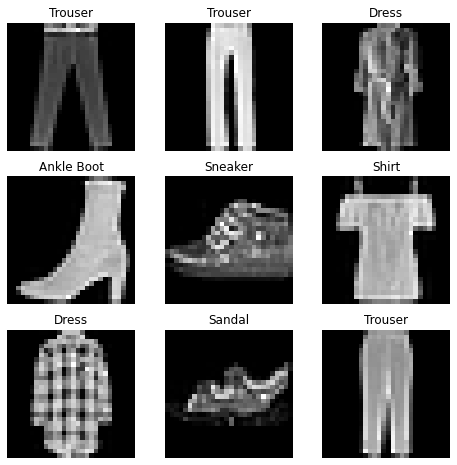

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

# 랜덤으로 9개 뽑아서 보기
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

**Creating a Custom Dataset for your files**
- Custom Datset class must implement 3 functions: `__init__`, `__len__`, `__getitem__`
- FashionMNIST images are stored in a directory `img_dir`, and their labels are stored separately in a CSV file `annotations_file`

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  
  # Runs once when instantiating the Dataset object
  # Initialize the directory containing the images, the annotations file, and both transforms
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
  
  # Returns the number of samples in our dataset
  def __len__(self):
    return len(self.img_labels)

  # Loads and returns a sample from the dataset at the given index
  def __getitem__(self, idx):
    # identifies the image's location on disk
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    # converts the image to a tensor
    image = read_image(img_path)
    # retrieves the corresponding label from the csv data
    label = self.img_labels.iloc[idx, 1]
    # calls the transform func on them (if applicable)
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    # returns the tensor image and corresponding label in a tuple
    return image, label

**Preparing data for training with DataLoaders**
- `Dataset`: retrieves the dataset's features, and labels one sample at a time
- While training, we want to pass samples in 'minibatches', reshuffle the data at every epoch to reduce overfitting, and use Python's `multiprocessing` to speed up data retrieval.
- `DataLoader`: iterable that abstracts this complexity for us in an easy API

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

**Iterate through the DataLoader**
- After loading the dataset into the `DataLoader`, we can iterate through the dataset
- Each iteration returns a batch of `train_features` and `train_labels`
- `shuffle=True` -> after we iterate over all batches, the data is shuffled

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


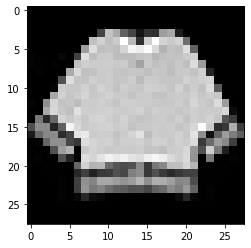

Label: 4


In [ ]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze() # [1, 28, 28] -> [28, 28]
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")